<a href="https://colab.research.google.com/github/SnehaVenkatesh19/Flight-Analytics/blob/main/Flight_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing

Before visualizing the data, we performed basic preprocessing to ensure quality and consistency:
- **Selected relevant columns** for the analysis: CarrierName, DepDelay, DayOfWeek.
- **Removed rows** with missing or null delay values.
- **Limited the dataset** to a manageable size (first 100,000 rows) for smoother performance.


In [9]:
import pandas as pd

# Upload the raw transactional dataset
from google.colab import files
uploaded = files.upload()


Saving flight_delays_bins.csv to flight_delays_bins (1).csv


In [3]:
import pandas as pd

cols = ['CarrierName', 'DepDelay', 'DayOfWeek']
df = pd.read_csv('flight_delays_bins.csv', usecols=cols)
print("Initial dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

df = df.dropna(subset=['DepDelay'])

# Filter: Remove extreme delays (e.g. > 1000 mins)
df = df[df['DepDelay'] <= 1000]

# Sample: Take a manageable sample (for performance)
df = df.sample(n=100000, random_state=42)

print("\nFinal dataset shape after cleaning:", df.shape)

df.head()


Initial dataset shape: (1068629, 3)

Missing values:
 DayOfWeek      0
DepDelay       0
CarrierName    0
dtype: int64

Final dataset shape after cleaning: (100000, 3)


,DayOfWeek,DepDelay,CarrierName
105674,5,18.0,JetBlue Airways
216183,7,31.0,United Airlines
302148,4,68.0,JetBlue Airways
46078,2,72.0,Delta Airlines
460834,5,19.0,Southwest Airlines


## Average Departure Delay by Airline


<ipython-input-4-8c445847d2a4>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="CarrierName", y="DepDelay", ci=None, estimator=lambda x: sum(x)/len(x))


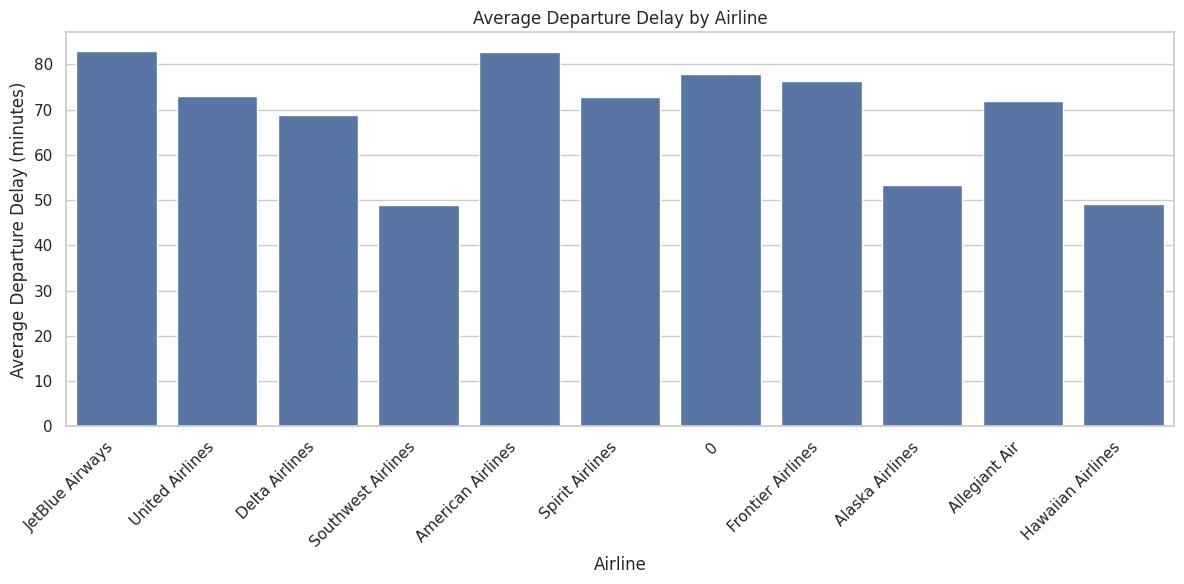

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="CarrierName", y="DepDelay", ci=None, estimator=lambda x: sum(x)/len(x))
plt.title("Average Departure Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Departure Delay (minutes)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##  Distribution of Departure Delays


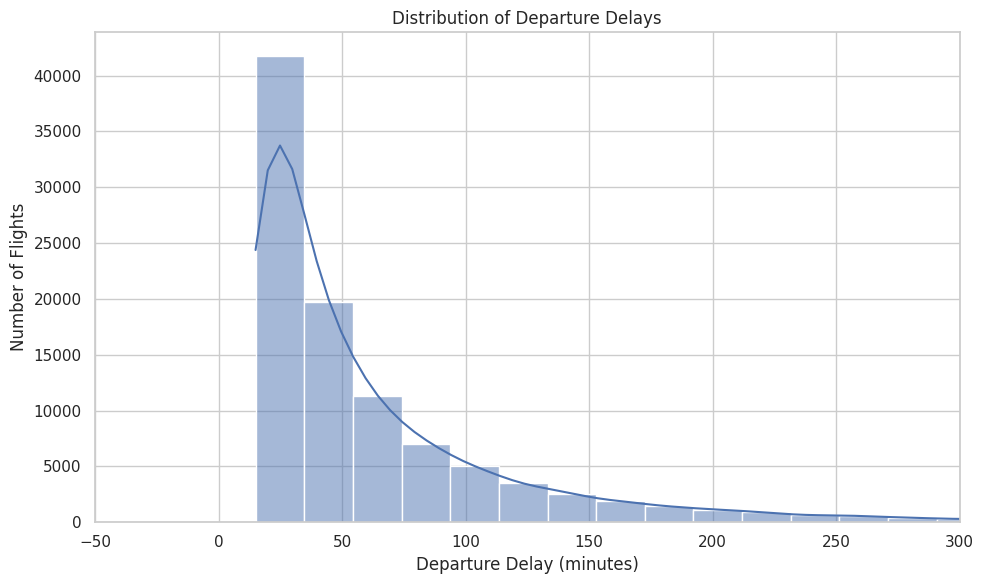

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="DepDelay", bins=50, kde=True)
plt.title("Distribution of Departure Delays")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Number of Flights")
plt.xlim(-50, 300)
plt.tight_layout()
plt.show()


##  Average Delay by Day of the Week


<ipython-input-6-aa8f75d0d3e9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="DayOfWeek", y="DepDelay", ci=None, estimator=lambda x: sum(x)/len(x))


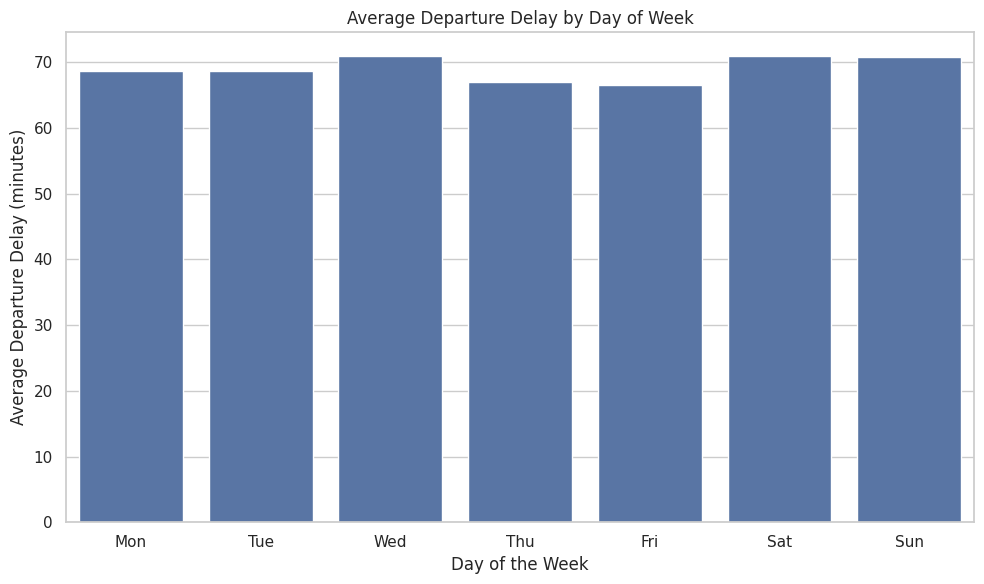

In [6]:
plt.figure(figsize=(10, 6))
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.barplot(data=df, x="DayOfWeek", y="DepDelay", ci=None, estimator=lambda x: sum(x)/len(x))
plt.title("Average Departure Delay by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Departure Delay (minutes)")
plt.xticks(ticks=range(0, 7), labels=day_labels)
plt.tight_layout()
plt.show()


##  Spread of Departure Delays by Airline


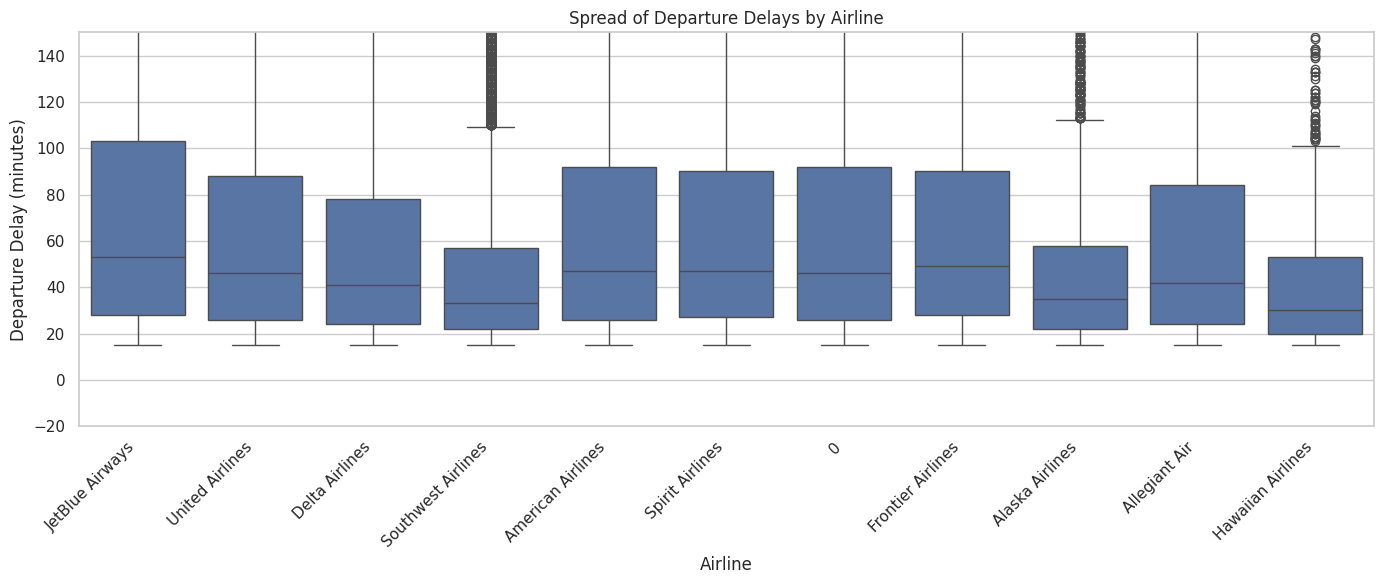

In [7]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="CarrierName", y="DepDelay")
plt.title("Spread of Departure Delays by Airline")
plt.xlabel("Airline")
plt.ylabel("Departure Delay (minutes)")
plt.xticks(rotation=45, ha='right')
plt.ylim(-20, 150)
plt.tight_layout()
plt.show()
